analysing the vocabulary of texts at individual word level. see below for word frequency clouds (and numerical counts), TF-IDF scores, and bigrams :)))

In [1]:
# importing required things

from collections import Counter, defaultdict
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from nltk.corpus import stopwords
from nltk import ngrams, BigramCollocationFinder
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from operator import itemgetter
from functions import remove_stopwords

In [2]:
#setting up

#getting texts
texts = []
textnames = []
folder = '/srv/data/companyTextsClean'
for file in os.listdir(folder):
    path = os.path.join(folder,file)
    f = open(path,'r')
    data = f.readlines()[0]
    texts.append(data)
    name = file.split('.')[0]
    textnames.append(name)
    f.close()
 
# list of lists of strings, each text broken up into individual token strings
tokenized = []
# list of strings, each text as confinuous string of tokens
corpus = []
for text in texts:
    words = []
    text = text.split(' ')
    #tokenize roughly by white space, can update later
    cleaned = remove_stopwords(text)
    for c in cleaned:
        if len(c) != 0:
            words.append(c[0].lower())
    #TODO: smarter way of getting a list of words while still using remove method?
    tokenized.append(words)
    corpus.append(' '.join(words))

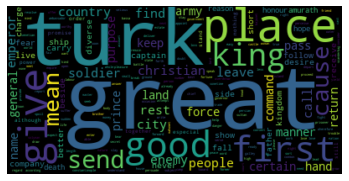

In [5]:
#term frequency & word clouds through wordcloud processing

#load onto dataframe
wordcounts = [Counter(t) for t in tokenized]
df = pd.DataFrame(wordcounts, index=[name for name in textnames]).fillna(0)

#use this for a single text 
# fileTF = "A04813"
# textstring = ' '.join(tokenized[textnames.index(fileTF)]).lower()
#use this for a collection of texts
wholecorpusstring = ' '.join(corpus)

# parameters to play with: min_word_length, collocations, collocation_threshold, stopwards

#single text
# wordcloud = WordCloud(stopwords=STOPWORDS, collocations=True, min_word_length=3).generate(textstring)
#corpus
wordcloud = WordCloud(stopwords=STOPWORDS, collocations=True, collocation_threshold=20, min_word_length=4).generate(wholecorpusstring)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#single text
# textdict = wordcloud.process_text(textstring)
#corpus
textdict = wordcloud.process_text(wholecorpusstring)

wordfreq={k: v for k, v in sorted(textdict.items(),reverse=True, key=lambda item: item[1])}
relfreq=wordcloud.words_

# not using this, doesn't print nicely
# N=40
# print("word frequencies:", list(wordfreq.items())[:N])
# print("relative frequencies:", list(relfreq.items())[:N])
        

In [6]:
# outputting the numbers for frequencies

# combining word frequencies and relative frequencies into one dictionary for cleaner printing
result = defaultdict(list)
for freq in (wordfreq, relfreq):
    for key, value in freq.items():
        result[key].append(value)
headers = ('absolute frequency', 'relative frequency')

print(pd.DataFrame((result.values()), result.keys(), headers).head(n=20))


           absolute frequency  relative frequency
great                    5034            1.000000
turk                     4885            0.970401
place                    3402            0.675805
give                     2668            0.529996
good                     2632            0.522845
first                    2483            0.493246
king                     2422            0.481128
send                     2297            0.456297
cause                    2161            0.429281
mean                     2043            0.405840
country                  2025            0.402265
city                     2004            0.398093
christian                1985            0.394319
call                     1976            0.392531
enemy                    1956            0.388558
find                     1875            0.372467
people                   1845            0.366508
leave                    1799            0.357370
rest                     1765            0.350616


In [5]:
# setting up manual term frequency

count = CountVectorizer(ngram_range=(1,3))
X = count.fit_transform(corpus)
X = X.toarray()
dataframe = pd.DataFrame(X, index =[name for name in textnames], columns=count.get_feature_names_out())


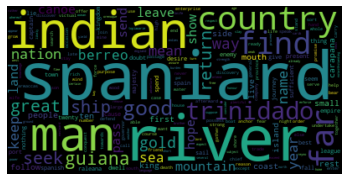

In [9]:
#word cloud generation through term freqs above

topstrings = dataframe.loc[fileTF].sort_values(ascending=False)[:4000]
textdict = dataframe.loc[fileTF].sort_values(ascending=False).to_dict()

wordcloud2 = WordCloud(min_word_length = 3)
wordcloud2.generate_from_frequencies(textdict)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

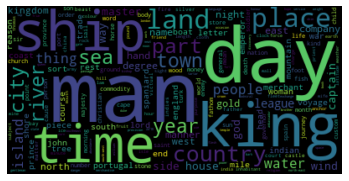

In [4]:
# generating word clouds of nouns in EP tuning

from allNounsEPTuning import nouns

nouncloud = WordCloud(min_word_length = 3)
nouncloud.generate_from_frequencies(nouns)

plt.imshow(nouncloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
#setting a text to sort by for TF-IDF analysis
basetext = 'A04813'

In [10]:
# using transformer, generate table to compare tf-idfs across multiple texts
# code accessed from EarlyPrint+Python jupyter notebook

# normalization turned off
# sublinear term frequency scaling turned on (takes log of term frequencies and can help to de-emphasize function words like pronouns and articles)
tfidf = TfidfTransformer(norm=None, sublinear_tf=True)
results = tfidf.fit_transform(df)

table = pd.DataFrame(results.toarray(), index=df.index, columns=df.columns)

# columns are texts, using .head(25) to show top 25 terms
# sort using words with highest tfidf scores in specified basetext as an example
table.T.sort_values(by=[basetext], ascending=False).head(25)

,A01932,A02495,A03149,A04813,A07886,A10821,A12458,A12460,A12466,A13290,...,A66847,A68617,A69149,A71305,A71306,A71307,A77422,A83297,B00052,B00963
trinidado,0.0,0.000000,2.686399,12.313160,0.0,4.548469,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,7.913890,0.000000,0.0,0.0,0.0,0.0
berreo,0.0,16.559219,0.000000,12.156225,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,2.909543,0.000000,0.0,0.0,0.0,0.0
raleana,0.0,12.438392,0.000000,11.855469,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
carapana,0.0,13.919803,0.000000,11.319202,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,6.106002,0.000000,0.0,0.0,0.0,0.0
carib,0.0,0.000000,0.000000,10.057843,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
marguerita,0.0,0.000000,0.000000,10.057843,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
oreliano,0.0,0.000000,0.000000,10.057843,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
topiawarie,0.0,7.629519,0.000000,9.845666,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
guiana,0.0,12.961344,5.007907,9.619029,0.0,4.404174,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,2.098612,10.308432,0.000000,0.0,0.0,0.0,0.0
nueuo,0.0,0.000000,0.000000,9.400995,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [11]:
# transformer version, but outputting tf-idf values for a single text, easier viewing

transformer = TfidfTransformer(norm=None, sublinear_tf=True, use_idf=True)
cv = CountVectorizer()
wc = cv.fit_transform(corpus)
wctrans = transformer.fit_transform(wc)

single = pd.DataFrame(wctrans[textnames.index(basetext)].T.todense(), index=cv.get_feature_names_out(), columns=[basetext + " TF-IDF"])
single = single.sort_values(basetext + ' TF-IDF', ascending=False)

print (single.head(25))

            A04813 TF-IDF
trinidado       12.313160
berreo          12.156225
raleana         11.855469
carapana        11.319202
carib           10.057843
oreliano        10.057843
marguerita      10.057843
topiawarie       9.845666
guiana           9.619029
iaos             9.400995
nueuo            9.400995
arwaccas         9.302461
canoe            8.964261
cumanaw          8.597078
reyno            8.571251
putijma          8.342959
bereo            8.342959
moruga           8.342959
barima           8.342959
amana            8.122743
caroli           8.122743
orenoque         7.913890
caraccas         7.629519
cassanari        7.629519
guanipa          7.592271


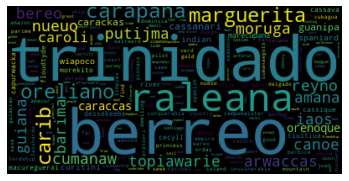

In [20]:
# tf-idf wordclouds - cannot just use wordcloud processing (rip)

tfidfcloud = WordCloud(min_word_length = 3)
tfidfcloud.generate_from_frequencies(single.to_dict()[basetext + ' TF-IDF'])

plt.imshow(tfidfcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [11]:
# setting new text for bigram test text
nfile = open('/srv/data/newEPTuningCleanerest/texts/A04813.txt', 'r')
test = nfile.readlines()[0].split(' ')

# just trying something...
# newtext=[]
# for root, dirs, files in os.walk('/srv/data/newEPTuningCleanerest'):
#     for file in files:
#         nfile = open(os.path.join(root,file), 'r')
#         read = nfile.readlines()[0].split(' ')
#         for word in read:
#             newtext.append(word)


In [14]:
#generating bigrams

# training bigram model: parameters to play with incl min count, threshold, scoring (npmi = more robust?)
bigrammodel = Phrases(tokenized, min_count = 2, threshold=-0.5, scoring='npmi')

# getting the frequency(?) of bigrams within test
bgcount = Counter(b for b in bigrammodel[test] if len(b.split("_")) > 1 )

# printing top 20 most common bigrams
print(pd.DataFrame(dict(bgcount).values(), index=dict(bgcount).keys(), columns=['bigram frequency']).sort_values('bigram frequency', ascending=False).head(n=20))

                  bigram frequency
spanish_king                     5
ten_ship                         4
mouth_river                      4
white_stone                      4
gold_mine                        3
plenty_gold                      3
find_inhabitant                  3
hatchet_knife                    3
great_river                      3
fresh_water                      3
fall_sea                         3
follow_direction                 2
beautiful_woman                  2
free_passage                     2
build_town                       2
flee_towards                     2
search_country                   2
spaniard_intend                  2
indian_show                      2
speak_language                   2


In [15]:
# looking for specific bigrams based on word
searchword = 'men'

for key in dict(bgcount).keys():
    if key.split('_')[0] == searchword or key.split('_')[-1] == searchword:
        print(key, dict(bgcount)[key])